In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
import keras.utils

import sklearn.metrics as skm

In [2]:
df = pd.read_csv('WBK_credito.csv')
df

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [4]:
#df['Emprego'].mode()
df['Emprego'].fillna(3.0,inplace=True)
df['ResidenciaDesde'].fillna(4.0,inplace=True)
df['Habitacao'].fillna(1.0,inplace=True)

In [5]:
#df['HistoricoCredito'].value_counts()
df.loc[df['HistoricoCredito'] == 0, 'HistoricoCredito'] = 2

In [6]:
#df['Profissao'].value_counts()
df.loc[df['Profissao'] == 999, 'Profissao'] = 4

In [7]:
df.drop(columns=['IDCREDITO'], inplace=True)

In [8]:
df

,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,4,1,0,0,0
996,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,4,1,1,0,1
997,18,2,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,6,2,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


-----------------------------------------------------------------

In [9]:
previsores = df.iloc[:,0:18].values
classe = df.iloc[:,18].values

In [11]:
type(classe)

numpy.ndarray

In [12]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=0)

In [17]:
modelo = Sequential()
modelo.add(Dense(units=18, input_dim=18, activation='relu'))
modelo.add(Dense(units=12, activation='relu'))
modelo.add(Dense(units=1, activation='sigmoid'))

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_treinamento, y_treinamento, batch_size=10, epochs=100)

Epoch 1/100


70/70 [==============================] - 2s 3ms/step - loss: 77.4372 - accuracy: 0.6157
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 2.0422 - accuracy: 0.5900
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 2.2505 - accuracy: 0.5557
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 3.3266 - accuracy: 0.5829
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 2.6920 - accuracy: 0.5871
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 1.3820 - accuracy: 0.6043
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 1.1554 - accuracy: 0.6386
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 1.4516 - accuracy: 0.6129
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 1.5614 - accuracy: 0.5943
Epoch 10/100
70/70 [==============================] - 0s 3ms/step - loss: 2.2904 - accuracy: 0.5614
Epoch 

In [18]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                342       
                                                                 
 dense_4 (Dense)             (None, 12)                228       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
previsoes = modelo.predict(X_teste)
previsoes

10/10 [==============================] - 0s 2ms/step


array([[0.64718854],
       [0.47264904],
       [0.5473079 ],
       [0.20253591],
       [0.6596559 ],
       [0.46621153],
       [0.6222728 ],
       [0.36150783],
       [0.28811693],
       [0.7421484 ],
       [0.4176224 ],
       [0.67187417],
       [0.35332263],
       [0.66454005],
       [0.24284004],
       [0.03169516],
       [0.16668065],
       [0.8249484 ],
       [0.6323737 ],
       [0.45238256],
       [0.7557621 ],
       [0.8562974 ],
       [0.54686004],
       [0.5102109 ],
       [0.6214195 ],
       [0.2466377 ],
       [0.7130379 ],
       [0.67203647],
       [0.90584886],
       [0.84776103],
       [0.80309117],
       [0.50761676],
       [0.515134  ],
       [0.58365005],
       [0.48610452],
       [0.42487106],
       [0.5034651 ],
       [0.57128805],
       [0.67385876],
       [0.66455436],
       [0.71323323],
       [0.61468107],
       [0.701486  ],
       [0.76756984],
       [0.7666943 ],
       [0.70397973],
       [0.95505816],
       [0.861

In [21]:
previsoes_binario = (previsoes > 0.5).astype(int)
previsoes_binario

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [23]:
confusao = confusion_matrix(y_teste, previsoes_binario)
confusao/

array([[ 44,  31],
       [ 56, 169]], dtype=int64)

In [24]:
taxa_acerto = accuracy_score(y_teste, previsoes_binario)
taxa_acerto

0.71

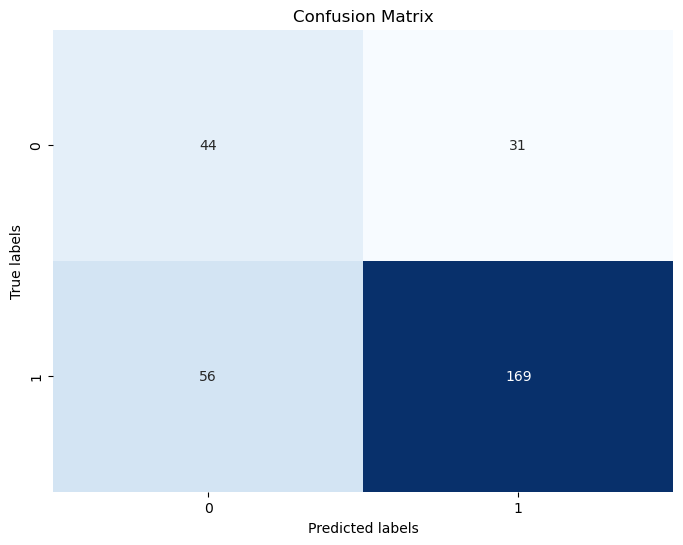

In [25]:
# 4. Plote a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
taxa_inad = 31/(31+169)
print(round(taxa_inad*100, 2), '%')

15.5 %
